1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [5]:
import pandas as pd
import numpy as np

with open('open_rank_20236.csv',encoding = 'utf-8') as file:
    data = pd.read_csv(file)

value = data['value']
sum = 0
print(max(value))
print(min(value))
print(np.mean(value))
print(np.median(value))    
    

1394.45
200.68
346.9679
273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [2]:
import pandas as pd
with open('activity_2022.csv',encoding='utf-8') as file:
    data = pd.read_csv(file)
    
    
growth_dict = {}
for index,row in data.iterrows():
    growthrate = []
    
    for i in range(1,12):
        next = '2022' + str(i+1) + '_value'
        prev = '2022' + str(i) + '_value'
        growthrate.append(f'{row[next] / row[prev] - 1:.2f}')
        
    growth_dict[row['repo']] = growthrate

    
avglist = []
for i in range(11):
    sum = 0
    for key,value in growth_dict.items():
        sum = sum + float(value[i])
    
    avglist.append(f'{sum / 10:.2f}')
    
growth_dict['average'] = avglist



    
        
    
    

3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [4]:
import pandas as pd
import numpy as np

china = pd.read_csv('china_2022.csv',encoding='utf-8')
world = pd.read_csv('global_2022.csv',encoding = 'utf-8')


analysis = {}
item = ['issue_comment','open_issue','open_pull','review_comment','merged_pull']
stats = ['max','min','mean','median','std']


for s in item:
    analysis[s] = {}
    obj = analysis[s]
    c = china[s]
    w = world[s]
    
    obj['max'] = [max(c),max(w),f'{max(w)/max(c):.2f}']
    obj['min'] = [min(c),min(w),f'{min(w)/min(c):.2f}']
    obj['mean'] = [np.mean(c),np.mean(w),f'{np.mean(w)/np.mean(c):.2f}']
    obj['median'] = [np.median(c),np.median(w),f'{np.median(w)/np.median(c):.2f}']
    obj['std'] = [np.std(c),np.std(w),f'{np.std(w)/np.std(c):.2f}']
    

print(analysis['issue_comment']['max'])
    
    
    
    




[167814, 1437317, '8.56']


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [1]:
#事件A：非软件型项目
#事件B：带有HTML/Markdown标签

A = 0.25
notA = 1 - A
BwhenA = 0.85
B_when_notA = 0.1

A_and_B = BwhenA * A
notA_and_B = B_when_notA * notA
B = A_and_B + notA_and_B

AwhenB = A_and_B / B
print(AwhenB)


0.7391304347826088


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [3]:
#事件A：是工具组件型项目
#事件B：由javascipt语言编写

A = 0.5
notA = 1 - A
BwhenA = 0.35
B_when_notA = 0.1

B_and_A = BwhenA * A 
B_and_notA = B_when_notA * notA

B = B_and_A + B_and_notA

AwhenB = B_and_A / B
print(AwhenB)



0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,1)

nx.draw(G,with_labels = True)
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

dig = nx.DiGraph()
for u in users:
    dig.add_node(u)
    
for e in edges:
    dig.add_edge(e[0],e[1])
    
nx.draw(dig,with_labels = True)
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

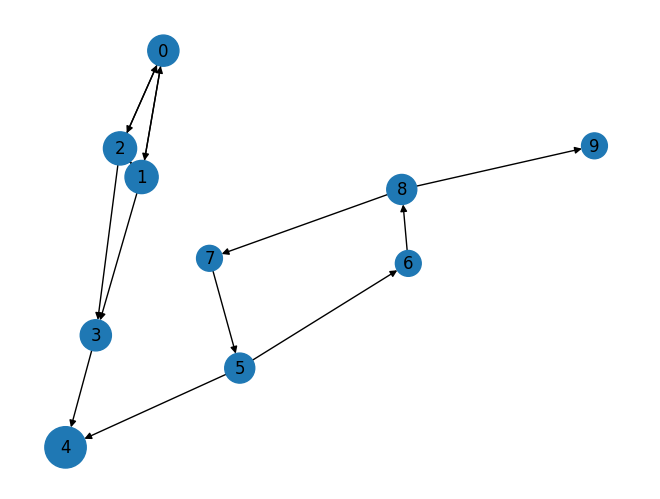

In [36]:
#假设阻尼系数 d = 0.85
#如果在最初给每个网页一个随机且非零的PR值，经过重复计算，这些页面的PR值会趋向于某个定值，也就是处于收敛的状态，即最终结果。
import networkx as nx
import matplotlib.pyplot as plt


d = 0.85
n = 10
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

pagerank = [0.1] * 10
newpr = [0.1] * 10

child = {}
parent = {}
for u in users:
    child[u] = []
    parent[u] = []    


for e in edges:
    child[e[0]].append(e[1])
    parent[e[1]].append(e[0])
    
for i in range(100):
    for u in users:
        newpr[u] = (1-d)/n
        for p in parent[u]:
            newpr[u] = newpr[u] + pagerank[p] * d / len(child[p])
    
    total = sum(newpr)    
    pagerank = [pr/total for pr in newpr]
    
dig = nx.DiGraph()
for u in users:
    dig.add_node(u)
    
for e in edges:
    dig.add_edge(e[0],e[1])
    
size = []
for pr in pagerank:
    size.append(pr * 5000)
    
nx.draw(dig,with_labels=True,node_size=size)
plt.show()
        
            

            